# naive bayes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [2]:
import os
os.chdir('E:\intership')

In [3]:
data=pd.read_csv("aaa.csv")

In [4]:
X = data.iloc[:, 0:8].values
Y= data.iloc[:, -1].values

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [9]:
y_pred  =  classifier.predict(X_test)

In [10]:
y_pred

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [11]:
Y_test

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, y_pred)
ac = accuracy_score(Y_test,y_pred)

In [13]:
cm

array([[45, 17],
       [11, 37]], dtype=int64)

In [14]:
ac

0.7454545454545455

In [15]:
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs =classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

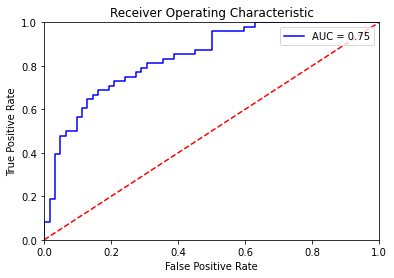

In [16]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % ac)
plt.legend(loc = 'upper right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# supporting vector classification

In [17]:
from sklearn.svm import SVC
sc = SVC(kernel='rbf')
sc_classifier = sc.fit(X_train,Y_train)  

In [18]:
svc_Y_test = sc_classifier.predict(X_test)
print(svc_Y_test)

[1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1
 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1
 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0]


In [19]:
svc_Y_train=sc_classifier.predict(X_train)  #train
print(svc_Y_train)

[1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0
 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1
 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0
 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0
 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1
 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0
 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0
 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0]


In [20]:
from sklearn.metrics import confusion_matrix
svc_cm_test = confusion_matrix(Y_test,svc_Y_test)   
svc_cm_test

array([[44, 18],
       [13, 35]], dtype=int64)

In [21]:
svc_cm_train =confusion_matrix(Y_train, svc_Y_train)
svc_cm_train

array([[184,  35],
       [ 35, 185]], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score
svc_acc_test=accuracy_score(Y_test, svc_Y_test)  
svc_acc_test

0.7181818181818181

In [23]:
svc_acc_train= accuracy_score(Y_train, svc_Y_train)   
svc_acc_train

0.8405466970387244

In [24]:
svc_pred  =  sc_classifier.predict(X_test)

In [25]:
#Precision score on Test and Train
from sklearn.metrics import precision_score
sv_precision_test= precision_score(Y_test, svc_Y_test, average='weighted')  
print(sv_precision_test)
sv_precision_train=precision_score(Y_train, svc_Y_train, average='weighted')
print(sv_precision_train)

0.7232523848214016
0.8405466970387244


In [26]:
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs =classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, svc_pred)
roc_auc = metrics.auc(fpr, tpr)

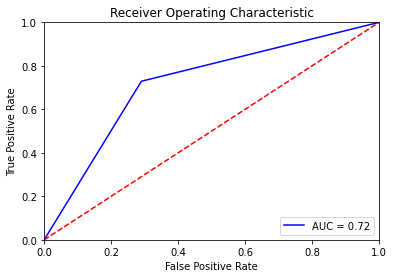

In [27]:
# PLOT ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ada boost classification

In [28]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 60
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold)

C:\Users\vagad\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [29]:
print(results)

[0.70454545 0.77272727 0.65909091 0.79545455 0.81818182 0.81818182
 0.72727273 0.77272727 0.68181818 0.72093023]


In [30]:
print(results.mean())

0.747093023255814


In [31]:
model.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=60, random_state=7)

In [32]:
ada_pred  =  model.predict(X_test)


In [33]:
ada_cm = confusion_matrix(Y_test, ada_pred)
ada_ac = accuracy_score(Y_test,ada_pred)



In [34]:
ada_cm

array([[49, 13],
       [ 9, 39]], dtype=int64)

In [35]:
ada_ac

0.8

In [36]:
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs =model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, ada_pred)
roc_auc = metrics.auc(fpr, tpr)

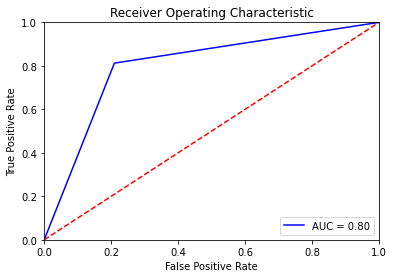

In [37]:
# PLOT ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()